In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile
import netket as nk
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from exp_utils import *
#from data_gen_full import *
%load_ext autoreload
%autoreload 2

def append_K_N_diff(df, m ,  key, N_list = np.linspace(2,3000, 15, dtype=int), N_trials = 20 , delta = 0.1):
    high_prob_kerr = []
    for N in N_list:
        high_prob_kerr.append( high_prob_upper( df.loc[N,:]["K_err"], delta ) )
    return high_prob_kerr


 

plt.rcParams.update({
     "text.usetex" : "true",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


plt.rc('figure', dpi=150)



```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 1) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{1}^{emp}(f^*) $ w.h.p

In [ ]:

with open('data_full_new.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index')
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'C'])

data
#data = data.sort_values(["m_train"])
#K = data.xs(("Havliscek","Generated"), level = 'kernel,dataset')['K_train'].iloc[0]
#eta_from_N(K, 2000, 0.1)
#N_from_eta(K, 0.492 )


In [3]:
#data.loc[:,[120],["optimal"]] ["N_vs_y_pred"][1]
data = data.rename_axis(index = lambda x: x.replace('_', ' ') if type(x)==str else x)
data =  data.rename(columns = lambda x: x.replace('_', ' ') if type(x)==str else x)
margin_err = []
N_star_margin = []
misclass_err = []
N_star_K = [] 
N_star_theorem = []
N_list = np.linspace(2,4000, 15, dtype=int)
for x in tqdm(data.index):
    #print(x)
    row = data.loc[x]
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
    N_star_margin.append(N_star_from_df(row["N vs y pred"], margin_err[-1],row["y train"]))
    N_star_K.append(N_from_eta(row["K train"], 0.492))
    print(N_star_K[-1])
   
    N_star_theorem.append( 2*(row["C val"]**2)*row["m sv"]* np.log(x[1]/0.1) )
data["margin err"] = margin_err
data["misclass"] = misclass_err
data["N star margin"] = np.trunc(N_star_margin )
data["N_star_K"] =  np.trunc(N_star_K)
data["N star theorem"] = N_star_theorem
data = data.sort_values("misclass")

data

  0%|                                                                                                                                                                                         | 0/42 [00:00<?, ?it/s]

N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.475      -0.00833333 -0.04166667 -0.06666667 -0.075      -0.075
 -0.075      -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
 -0.08333333 -0.08333333 -0.08333333]
N vs Remp-Rstar


  2%|████▏                                                                                                                                                                            | 1/42 [00:17<11:59, 17.54s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.37009826e+01  3.65996675e-01  1.17032290e-01  9.13065799e-03
 -6.21598104e-02 -1.07484597e-01 -1.44085029e-01 -1.67822670e-01
 -1.89559918e-01 -2.09837939e-01]
1739.1253390382328
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.375 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.   ]
N vs Remp-Rstar


  5%|████████▍                                                                                                                                                                        | 2/42 [00:34<11:32, 17.31s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.41246090e+01  3.85710953e-01  1.31325399e-01  1.35825404e-02
 -5.81394468e-02 -1.02398630e-01 -1.22249348e-01 -1.63539031e-01
 -1.78225826e-01 -1.96199805e-01]
1773.1677139500632
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.43333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


  7%|████████████▋                                                                                                                                                                    | 3/42 [00:51<11:10, 17.20s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.44615981  0.39123116  0.13142407  0.02949093 -0.05252454 -0.09887631
 -0.13202895 -0.16082859 -0.18195147 -0.19802226]
1867.6854532824098
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.50833333  0.21666667  0.1         0.06666667  0.03333333  0.01666667
  0.00833333  0.00833333  0.          0.          0.         -0.00833333
 -0.00833333 -0.00833333 -0.00833333]
N vs Remp-Rstar


 10%|████████████████▊                                                                                                                                                                | 4/42 [01:08<10:50, 17.11s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.52032359e+01  4.38686478e-01  1.70534739e-01  4.58583200e-02
 -1.35167333e-02 -7.20472777e-02 -1.10271417e-01 -1.36350385e-01
 -1.63021829e-01 -1.83292353e-01]
2096.9116773946857
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.49166667  0.03333333  0.         -0.025      -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333]
N vs Remp-Rstar


 12%|█████████████████████                                                                                                                                                            | 5/42 [01:25<10:28, 16.99s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.28098962  0.39232927  0.1404595   0.01594178 -0.04933734 -0.07804655
 -0.12901848 -0.15708019 -0.1729227  -0.19486001]
1803.6176779264538
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
N vs Remp-Rstar


 14%|█████████████████████████▎                                                                                                                                                       | 6/42 [01:42<10:09, 16.92s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.38684704  0.39380096  0.12622126  0.01948502 -0.04829296 -0.09478097
 -0.13439476 -0.1431654  -0.1811776  -0.19353507]
1827.6489302819632
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.51666667  0.025      -0.01666667 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333]
N vs Remp-Rstar


 17%|█████████████████████████████▌                                                                                                                                                   | 7/42 [01:58<09:49, 16.85s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.37159565e+01  3.63770006e-01  9.77319565e-02 -4.54098795e-03
 -6.54561733e-02 -1.15203020e-01 -1.40568910e-01 -1.75105082e-01
 -1.93901720e-01 -2.03588107e-01]
1643.342824147077
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.53333333 0.10833333 0.03333333 0.025      0.00833333 0.00833333
 0.00833333 0.00833333 0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 19%|█████████████████████████████████▋                                                                                                                                               | 8/42 [02:15<09:30, 16.79s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.859794    0.46132797  0.17202554  0.05534192 -0.01695339 -0.07161881
 -0.11446588 -0.14068179 -0.16022141 -0.18062021]
2093.1066212598816
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.55833333 0.11666667 0.025      0.01666667 0.00833333 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 21%|█████████████████████████████████████▉                                                                                                                                           | 9/42 [02:32<09:11, 16.72s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.16075816  0.43937624  0.16375963  0.04470866 -0.02668453 -0.0764
 -0.11027623 -0.13806504 -0.15506369 -0.17558932]
2015.767219881973
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.53333333 0.1        0.03333333 0.025      0.00833333 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 24%|█████████████████████████████████████████▉                                                                                                                                      | 10/42 [02:48<08:53, 16.67s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.89595924  0.44031329  0.17579161  0.04405153 -0.02511956 -0.08074011
 -0.10609653 -0.1321187  -0.15489763 -0.18029199]
2021.6634022427081
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.50833333 0.35833333 0.28333333 0.31666667 0.23333333 0.225
 0.2        0.15833333 0.14166667 0.14166667 0.11666667 0.1
 0.10833333 0.125      0.10833333]
N vs Remp-Rstar


 26%|██████████████████████████████████████████████                                                                                                                                  | 11/42 [03:05<08:36, 16.66s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.50848617  0.41777796  0.14210039  0.03197336 -0.04165317 -0.09479232
 -0.12261922 -0.15280188 -0.17199958 -0.19271616]
1909.1613290049568
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.43333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 29%|██████████████████████████████████████████████████▎                                                                                                                             | 12/42 [03:22<08:20, 16.68s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.38179025e+01  3.47763434e-01  1.07124729e-01  5.08781010e-03
 -6.40112835e-02 -1.15469533e-01 -1.39676781e-01 -1.66285240e-01
 -1.91704227e-01 -2.10129078e-01]
1708.8895456625
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.5        0.3        0.25       0.2        0.175      0.13333333
 0.125      0.075      0.05833333 0.05       0.05       0.04166667
 0.03333333 0.01666667 0.025     ]
N vs Remp-Rstar


 31%|██████████████████████████████████████████████████████▍                                                                                                                         | 13/42 [03:38<08:03, 16.66s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.08941115  0.3978041   0.13748744  0.02821708 -0.03838858 -0.08827036
 -0.12216248 -0.15071028 -0.17531977 -0.19294168]
1903.2635424438213
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.49166667  0.04166667  0.         -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333]
N vs Remp-Rstar


 33%|██████████████████████████████████████████████████████████▋                                                                                                                     | 14/42 [03:55<07:46, 16.66s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.27879737  0.42424192  0.13805399  0.02394144 -0.04572744 -0.08978993
 -0.12938946 -0.14745045 -0.17331354 -0.18858186]
1858.8381558490892
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.34166667 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667
 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667
 -0.01666667 -0.01666667 -0.01666667]
N vs Remp-Rstar


 36%|██████████████████████████████████████████████████████████████▊                                                                                                                 | 15/42 [04:12<07:29, 16.65s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.42949589e+01  4.07329687e-01  1.29624611e-01  1.08957839e-02
 -5.23198752e-02 -9.72537018e-02 -1.30675435e-01 -1.56243411e-01
 -1.70730331e-01 -1.98959707e-01]
1763.7166637386235
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.45833333  0.025       0.         -0.025      -0.025      -0.03333333
 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333]
N vs Remp-Rstar


 38%|███████████████████████████████████████████████████████████████████                                                                                                             | 16/42 [04:28<07:12, 16.62s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.34077465  0.3952766   0.13155097  0.02259443 -0.04529435 -0.09370727
 -0.13325572 -0.15699656 -0.17018348 -0.19530152]
1852.8234786788066
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.34166667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 40%|███████████████████████████████████████████████████████████████████████▏                                                                                                        | 17/42 [04:45<06:55, 16.62s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.0524523   0.38879275  0.13226035  0.03225175 -0.0492636  -0.09415695
 -0.13679388 -0.15872195 -0.17480328 -0.1973165 ]
1887.7190377429013
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.21666667 -0.23333333 -0.23333333 -0.24166667 -0.24166667 -0.25
 -0.25       -0.24166667 -0.24166667 -0.25       -0.25       -0.25
 -0.25       -0.25       -0.25833333]
N vs Remp-Rstar


 43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                    | 18/42 [05:01<06:38, 16.61s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.39266612  0.39459646  0.1501977   0.02058644 -0.04610944 -0.09684731
 -0.12655724 -0.154286   -0.18000353 -0.19762566]
1839.4099350056167
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
N vs Remp-Rstar


 45%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                | 19/42 [05:18<06:21, 16.59s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.26733732  0.40510492  0.14207402  0.01489641 -0.05323953 -0.08967608
 -0.12332004 -0.1467841  -0.18546038 -0.19800772]
1789.4112928600894
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
N vs Remp-Rstar


 48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 20/42 [05:34<06:05, 16.60s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.393758    0.39594166  0.1321563   0.01999769 -0.04256826 -0.09049938
 -0.12835344 -0.15522893 -0.1817642  -0.19748805]
1845.4988710706853
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.34166667  0.025      -0.05833333 -0.11666667 -0.13333333 -0.175
 -0.175      -0.20833333 -0.20833333 -0.21666667 -0.21666667 -0.21666667
 -0.225      -0.225      -0.23333333]
N vs Remp-Rstar


 50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 21/42 [05:52<05:51, 16.74s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.41385331  0.40267448  0.13628495  0.02348716 -0.0374736  -0.08794373
 -0.12098654 -0.15898399 -0.17537057 -0.19437453]
1881.9606250280688
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.075      -0.34166667 -0.375      -0.36666667 -0.375      -0.375
 -0.375      -0.38333333 -0.375      -0.375      -0.375      -0.375
 -0.375      -0.38333333 -0.375     ]
N vs Remp-Rstar


 52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 22/42 [06:09<05:36, 16.84s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.34413535  0.39331599  0.15166272  0.02669549 -0.04095523 -0.08556322
 -0.12380332 -0.1571746  -0.17176745 -0.1943021 ]
1887.1387782669235
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.09166667 -0.35833333 -0.40833333 -0.425      -0.44166667 -0.44166667
 -0.44166667 -0.44166667 -0.44166667 -0.44166667 -0.45       -0.45
 -0.44166667 -0.44166667 -0.45      ]
N vs Remp-Rstar


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 23/42 [06:26<05:22, 16.99s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.19899017  0.46497112  0.16763301  0.04576975 -0.01763203 -0.07707392
 -0.10623963 -0.13805644 -0.15703947 -0.18384902]
2068.8951640575006
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.53333333 0.11666667 0.03333333 0.025      0.00833333 0.00833333
 0.00833333 0.00833333 0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 24/42 [06:43<05:04, 16.91s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.02889965  0.45047807  0.17474585  0.05471783 -0.02535404 -0.08065287
 -0.10636956 -0.13619082 -0.15804221 -0.18246173]
2047.4920094798044
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.05       -0.34166667 -0.36666667 -0.38333333 -0.40833333 -0.39166667
 -0.41666667 -0.425      -0.41666667 -0.41666667 -0.40833333 -0.41666667
 -0.41666667 -0.41666667 -0.41666667]
N vs Remp-Rstar


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 25/42 [06:59<04:46, 16.83s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.02928256  0.41382128  0.14960603  0.03929731 -0.03059946 -0.0841209
 -0.11960742 -0.15092162 -0.16737607 -0.19248342]
1980.2191055284861
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.2        -0.25833333 -0.28333333 -0.3        -0.29166667 -0.3
 -0.3        -0.3        -0.3        -0.3        -0.3        -0.3
 -0.3        -0.3        -0.3       ]
N vs Remp-Rstar


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 26/42 [07:16<04:29, 16.86s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.17309025  0.43466279  0.1825475   0.03729637 -0.02813735 -0.0699141
 -0.10665168 -0.13634382 -0.16457222 -0.17758575]
1984.5327732155047
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.55833333 0.1        0.05       0.025      0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 27/42 [07:33<04:13, 16.87s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.15531051  0.43364949  0.16710591  0.05458762 -0.02278733 -0.07975699
 -0.10915977 -0.13827568 -0.15944618 -0.18467583]
2059.7847372972565
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.28333333  0.025      -0.03333333 -0.11666667 -0.13333333 -0.13333333
 -0.175      -0.175      -0.175      -0.175      -0.18333333 -0.18333333
 -0.19166667 -0.19166667 -0.2       ]
N vs Remp-Rstar


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 28/42 [07:50<03:57, 16.93s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.52511152  0.39448126  0.14105463  0.03423029 -0.05294097 -0.08060186
 -0.12283515 -0.1520934  -0.16573245 -0.19027846]
1886.067499294659
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.34166667 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667
 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667 -0.01666667
 -0.01666667 -0.01666667 -0.01666667]
N vs Remp-Rstar


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 29/42 [08:07<03:39, 16.90s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.34105916  0.39747153  0.13421149  0.0156794  -0.05502204 -0.09684872
 -0.13321825 -0.15181547 -0.17645565 -0.19893809]
1791.1558202885976
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
N vs Remp-Rstar


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 30/42 [08:25<03:24, 17.07s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.36981793  0.41254716  0.13491802  0.0282546  -0.05359033 -0.09383732
 -0.13296563 -0.15421777 -0.1804617  -0.19620424]
1859.712811112028
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.15833333 -0.29166667 -0.3        -0.30833333 -0.30833333 -0.30833333
 -0.30833333 -0.30833333 -0.30833333 -0.30833333 -0.30833333 -0.30833333
 -0.30833333 -0.30833333 -0.30833333]
N vs Remp-Rstar


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 31/42 [08:41<03:07, 17.04s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.36972660e+01  3.55774088e-01  1.19959930e-01  1.08807816e-02
 -6.20039225e-02 -9.08890786e-02 -1.43121093e-01 -1.71091632e-01
 -1.89592096e-01 -2.07843710e-01]
1750.9043730627343
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.44166667  0.         -0.03333333 -0.05       -0.05833333 -0.06666667
 -0.075      -0.075      -0.075      -0.06666667 -0.075      -0.075
 -0.075      -0.075      -0.075     ]
N vs Remp-Rstar


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 32/42 [08:58<02:49, 16.93s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.39074684e+01  3.66141907e-01  1.22758799e-01  2.29196529e-03
 -5.75377400e-02 -1.03158190e-01 -1.41702192e-01 -1.71625765e-01
 -1.90369158e-01 -2.03501626e-01]
1689.273792276763
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.28333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333]
N vs Remp-Rstar


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 33/42 [09:15<02:31, 16.84s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.454272    0.40104406  0.14389164  0.02746546 -0.03320059 -0.09166202
 -0.11839686 -0.1510017  -0.17266243 -0.19347012]
1919.4171649630193
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.30833333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
 -0.08333333 -0.08333333 -0.08333333]
N vs Remp-Rstar


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 34/42 [09:31<02:14, 16.79s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.36077571e+01  3.53818619e-01  1.01142809e-01 -5.26153514e-03
 -6.59231437e-02 -1.12479082e-01 -1.39929236e-01 -1.61391751e-01
 -1.88860513e-01 -2.08875920e-01]
1640.539600057894
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.48333333  0.03333333  0.         -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333]
N vs Remp-Rstar


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 35/42 [09:48<01:57, 16.72s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.41057672  0.39927981  0.13291122  0.0275823  -0.04225428 -0.09266564
 -0.11937706 -0.14939445 -0.17155555 -0.18856866]
1887.3316349506765
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.45       0.00833333 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 36/42 [10:05<01:40, 16.70s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.35474900e+01  3.48423578e-01  1.15128601e-01  3.96251010e-04
 -6.93075412e-02 -1.08651556e-01 -1.39808753e-01 -1.72286835e-01
 -1.89656318e-01 -2.11404233e-01]
1671.1569501075987
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.45833333  0.01666667 -0.01666667 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333 -0.03333333
 -0.03333333 -0.03333333 -0.03333333]
N vs Remp-Rstar


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 37/42 [10:22<01:23, 16.76s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.34887676e+01  3.40708301e-01  9.79350726e-02 -6.59123384e-03
 -6.87430418e-02 -1.11978316e-01 -1.47205934e-01 -1.72510832e-01
 -2.02202365e-01 -2.12288648e-01]
1632.981716241607
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.2        -0.25833333 -0.3        -0.31666667 -0.31666667 -0.325
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
 -0.33333333 -0.33333333 -0.33333333]
N vs Remp-Rstar


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 38/42 [10:38<01:07, 16.81s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.05713183  0.44417136  0.17172598  0.05899577 -0.02039263 -0.06298599
 -0.10622286 -0.14055957 -0.16286727 -0.18304533]
2080.6839572628182
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.26666667 -0.175      -0.175      -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333]
N vs Remp-Rstar


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 39/42 [10:55<00:50, 16.82s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[ 1.33843299e+01  3.63254837e-01  1.01869649e-01  1.48279899e-03
 -6.82656361e-02 -1.17196047e-01 -1.47279528e-01 -1.71186955e-01
 -1.91773622e-01 -2.07285452e-01]
1679.8059667223076
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[0.55       0.11666667 0.05       0.01666667 0.00833333 0.00833333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
N vs Remp-Rstar


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 40/42 [11:12<00:33, 16.78s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.9709704   0.44461147  0.16977982  0.04923328 -0.02510161 -0.07556997
 -0.1060181  -0.13366346 -0.15810014 -0.17935257]
2035.806856785664
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.50833333  0.2         0.10833333  0.06666667  0.04166667  0.025
  0.00833333  0.          0.          0.         -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333]
N vs Remp-Rstar


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 41/42 [11:29<00:16, 16.77s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[15.19262918  0.43932173  0.16393516  0.04962012 -0.02813799 -0.06574366
 -0.10848405 -0.14227077 -0.16188714 -0.17884618]
2022.3772535594405
N vs Remp-Rstar
[   2  287  573  858 1144 1429 1715 2001 2286 2572 2857 3143 3428 3714
 4000]
[ 0.075      -0.34166667 -0.38333333 -0.38333333 -0.4        -0.39166667
 -0.4        -0.40833333 -0.4        -0.40833333 -0.40833333 -0.41666667
 -0.41666667 -0.41666667 -0.425     ]
N vs Remp-Rstar


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [11:46<00:00, 16.82s/it]

[2.00000000e+00 5.57333333e+02 1.11266667e+03 1.66800000e+03
 2.22333333e+03 2.77866667e+03 3.33400000e+03 3.88933333e+03
 4.44466667e+03 5.00000000e+03]
[14.91936771  0.43812032  0.16633876  0.04593574 -0.02195115 -0.07585573
 -0.1167307  -0.13083939 -0.15480577 -0.18346252]
2043.7668989137128


N vs y pred  \
kernel,dataset              m train C                                                            
(QAOA, Checkerboard)        120     optimal                                                ...   
(Havliscek, Generated)      120     1                                                      ...   
(Angle, Generated)          120     4                                                      ...   
(Havliscek, Generated)      120     4                                                      ...   
(Circ-Hubr,2, Two_Moons)    120     1                                                      ...   
                                    4                                                      ...   
(QAOA, Checkerboard)        120     1                                                      ...   
                                    4                                                      ...   
(QAOA,2, Checkerboard)      120     1                                                      ...   
(QAOA, Two_Moons)           120     1                                                      ...   
(QAOA,2, Checkerboard)      120     4                                                      ...   
(QAOA, Two_Moons)           120     4                                                      ...   
(Angle,2, Two_Moons)        120     4                                                      ...   
(QAOA, Generated)           120     1                                                      ...   
(Angle,2, Two_Moons)        120     1                                                      ...   
(QAOA, Generated)           120     4                                                      ...   
(Circ-Hubr, Generated)      120     4                                                      ...   
(QAOA,2, Two_Moons)         120     4                                                      ...   
(Circ-Hubr,2, Checkerboard) 120     4                                                      ...   
(Havliscek,2, Checkerboard) 120     1                                                      ...   
(Havliscek,2, Two_Moons)    120     optimal                                                ...   
(Circ-Hubr,2, Two_Moons)    120     optimal                                                ...   
(Circ-Hubr, Generated)      120     optimal                                                ...   
(Havliscek,2, Checkerboard) 120     optimal                                                ...   
(QAOA,2, Two_Moons)         120     optimal                                                ...   
(Angle,2, Two_Moons)        120     optimal                                                ...   
(Angle, Generated)          120     optimal                                                ...   
(QAOA, Generated)           120     optimal                                                ...   
(Havliscek, Generated)      120     optimal                                                ...   
(QAOA,2, Two_Moons)         120     1                                                      ...   
(QAOA,2, SymDonuts)         120     optimal                                                ...   
(Circ-Hubr,2, Checkerboard) 120     optimal                                                ...   
(QAOA,2, Checkerboard)      120     optimal                                                ...   
(Havliscek,2, Two_Moons)    120     1                                                      ...   
(Havliscek,2, Checkerboard) 120     4                                                      ...   
(Havliscek,2, Two_Moons)    120     4                                                      ...   
(QAOA, Two_Moons)           120     optimal                                                ...   
(Angle, Generated)          120     1                                                      ...   
(Circ-Hubr, Generated)      120     1                                                      ...   
(QAOA,2, SymDonuts)         120     4                            

In [25]:
df = data[data["N star margin"] > 2]
df = data[data["margin err"] < 0.15]


df = df[["C val", "m sv", "margin err", "N star margin",  "N star theorem", "N_star_K"]]
df.xs(1, level="C").sort_values("m sv")


,,C val,m sv,margin err,N star margin,N star theorem,N_star_K
"kernel,dataset",m train,,,,,,
"(QAOA, Two_Moons)",120,1.0,21,0.083333,226.0,297.783227,1715.0
"(Havliscek,2, Two_Moons)",120,1.0,21,0.016667,273.0,297.783227,1859.0
"(Circ-Hubr,2, Two_Moons)",120,1.0,25,0.016667,273.0,354.503842,1842.0
"(QAOA,2, Two_Moons)",120,1.0,30,0.000000,287.0,425.404610,1862.0


In [26]:
df = data[data["N star margin"] > 2]
df = data[data["margin err"] < 0.15]

df = data[["C val", "m sv", "margin err", "N star margin",  "N star theorem", "N_star_K"]]
df.xs("optimal", level="C").sort_values("m sv")


,,C val,m sv,margin err,N star margin,N star theorem,N_star_K
"kernel,dataset",m train,,,,,,
"(QAOA, Two_Moons)",120,4.089796,12,0.000000,287.0,2846.200285,1641.0
"(Angle,2, Two_Moons)",120,4.089796,16,0.033333,458.0,3794.933713,1650.0
"(QAOA, Checkerboard)",120,4.089796,20,0.083333,282.0,4743.667141,1752.0
"(Circ-Hubr,2, Two_Moons)",120,4.089796,21,0.000000,287.0,4980.850498,1807.0
"(Havliscek,2, Two_Moons)",120,4.089796,22,0.000000,287.0,5218.033855,1830.0
"(Circ-Hubr,2, Checkerboard)",120,12.252721,24,0.041667,4000.0,51092.514214,1940.0
"(QAOA,2, Checkerboard)",120,4.089796,24,0.008333,573.0,5692.400569,1847.0
"(Havliscek,2, Checkerboard)",120,4.089796,25,0.033333,573.0,5929.583926,1860.0
"(QAOA,2, Two_Moons)",120,4.089796,29,0.000000,287.0,6878.317354,1846.0


In [28]:
20*16*np.log(120)

1531.9973576902546

In [13]:
#idx_c = [x for x in data.index if x[0][1] == "Checkerboard"]
#data.loc[idx_c]

In [14]:

data = data[data["N star margin"] > 2]
df = data[["C val", "margin err", "misclass", "N star margin"  ] ].sort_values("margin err")
Kerr_list = []
N_star_Kerr = []

for x in df.index:
    f =  interp1d(N_list, data.loc[x]["Kerror vs. N"])
    Kerr_list.append(f(df.loc[x]["N star margin"]) )
    model = LinearRegression()
    model.fit(np.log(data.loc[x]["Kerror vs. N"]).reshape(-1,1) , np.log(N_list))
    N_star_Kerr.append(np.exp( model.predict( np.log(data.loc[x]["margin err"]).reshape(1,-1) ) )[0] )
df["Kerr (N_star)"] = np.around(Kerr_list, 4)
df["Kerr/Margin_err"] = df["Kerr (N_star)"]/df["margin err"]
df["N star K err(extrapolated) "] = np.trunc(N_star_Kerr)
df

/tmp/ipykernel_2148487/3607129038.py:11: RuntimeWarning: divide by zero encountered in log
  N_star_Kerr.append(np.exp( model.predict( np.log(data.loc[x]["margin err"]).reshape(1,-1) ) )[0] )


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [166]:
model.fit(np.log(N_list).reshape(-1,1),  np.log(data.loc[x]["Kerror vs. N"]))

LinearRegression()

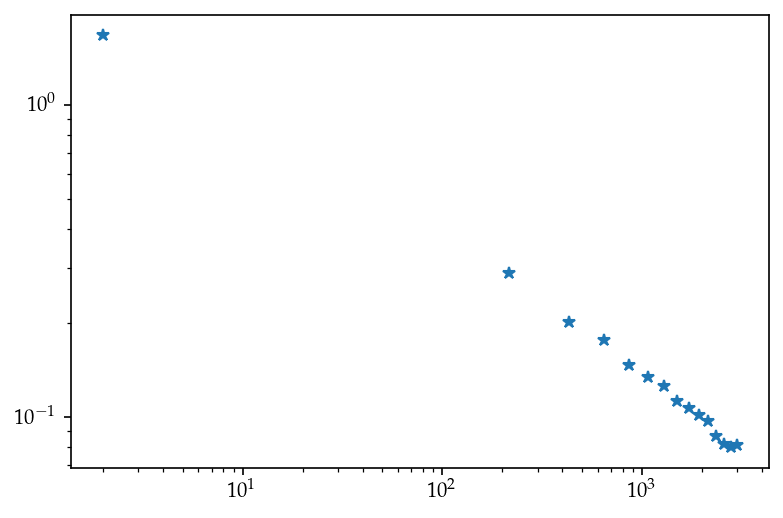

In [156]:
plt.plot(np.linspace(2,3000, 15, dtype=int),  data.iloc[1]["Kerror vs. N"], "*")
plt.xscale("log")
plt.yscale("log")

In [110]:
##Compute margin error and miscalssifications
#data["f pred exact"] = exact_y_pred
margin_err = []
N_star_margin = []
misclass_err = []
for x in tqdm(data.index):
    row = data.loc[x]
    print((row["y train"]*row["f pred exact"]).shape)
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
    N_star_margin.append(N_star_from_df(row["N vs y pred"], margin_err[-1],row["y train"]))
data["margin err"] = margin_err
data["misclass"] = misclass_err
data["N star margin"] = N_star_margin 

  0%|          | 0/40 [00:00<?, ?it/s]

(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.38333333 -0.03333333 -0.05833333 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.175      -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.13333333 -0.24166667 -0.24166667 -0.24166667 -0.24166667 -0.24166667
 -0.24166667 -0.24166667 -0.25       -0.24166667 -0.25       -0.25
 -0.25       -0.25       -0.25      ]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.35833333 -0.05833333 -0.10833333 -0.13333333 -

[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333
 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333
 -0.38333333 -0.38333333 -0.38333333]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375
 -0.375 -0.375 -0.375 -0.375 -0.375]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.35833333 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.366666

,,,N vs y pred,f pred exact,y train,C val,margin err,misclass,N star margin,Kerror vs. N
"kernel,dataset",m train,C,,,,,,,,
"(QAOA,2, Two_Moons)",120,optimal,...,"[-1.0195259485855273, 0.9955891578850797, 0.99...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",2.251361,0.066667,0.000000,198.880000,"[1.9543490846393672, 0.28012750816352594, 0.20..."
"(Circ-Hubr,2, Two_Moons)",120,optimal,...,"[-1.0673709225756076, 1.0001299164674005, 1.00...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.620068,0.183333,0.000000,106.511628,"[1.9390283435663676, 0.2781144577794555, 0.209..."
"(Havliscek,2, Two_Moons)",120,optimal,...,"[-1.0370726468849878, 1.062008341292845, 1.045...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.620068,0.250000,0.000000,78.088889,"[1.9548007344420721, 0.27720839257046137, 0.19..."
"(Angle,2, Two_Moons)",120,optimal,...,"[-1.1381286818326026, 1.0051789074222017, 0.99...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",2.659184,0.150000,0.000000,186.040000,"[1.9334529846692656, 0.2777506917410889, 0.205..."
"(Angle, Generated)",120,optimal,...,"[0.9996068622092524, 1.0407913472043282, 0.999...","[1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1...",2.047449,0.050000,0.000000,430.000000,"[1.7997946596116192, 0.28319957370188126, 0.20..."
"(Circ-Hubr, Generated)",120,optimal,...,"[0.9997396271680881, -0.9996850016718264, -1.8...","[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1...",2.251361,0.125000,0.000000,399.428571,"[1.6151040538590484, 0.3167670948813982, 0.216..."
"(Havliscek, Generated)",120,optimal,...,"[-1.0003006489389001, -0.9999717994260411, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0,...",1.435714,0.100000,0.000000,311.111111,"[1.2334897263117666, 0.29001759501739, 0.20969..."
"(QAOA, Generated)",120,optimal,...,"[-0.9998374562500818, -0.9999496223682, -1.000...","[-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, ...",1.231803,0.250000,0.000000,138.595745,"[1.6668262626113255, 0.28829041637344666, 0.20..."
"(QAOA, Two_Moons)",120,optimal,...,"[-1.3671447086202027, 0.9366113054844601, 0.95...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.416156,0.516667,0.016667,2.000000,"[1.9363128483438583, 0.28018177862060467, 0.19..."


In [41]:
#data["exact f pred"] = exact_y_pred
margin_err = []
misclass_err = []
for x in tqdm(data.index):
    row = data.loc[x]
    print((row["y train"]*row["exact f pred"]).shape)
    margin_err.append( np.mean(row["y train"]*row["exact f pred"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["exact f pred"]<0 ) ) 
data["margin err"] = margin_err
data["misclass"] = misclass_err

,,,N vs y pred,y train,C val,exact f pred,margin err,misclass
"kernel,dataset",m train,C,,,,,,
"(Havliscek, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.0416646563026204, 0.43155088536066155, 0.9...",0.300000,0.133333
"(Circ-Hubr, Generated)",60,optimal,...,"[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1...",1.850340,"[0.9996400306345736, -1.0000368833464717, -1.3...",0.150000,0.000000
"(Angle, Two_Moons)",60,optimal,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",0.831633,"[-0.9171192534355459, 0.12178806747153621, 0.6...",0.466667,0.166667
"(QAOA,2, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.3035554813285406, 1.2308586732457023, 0.99...",0.016667,0.000000
"(QAOA, Two_Moons)",60,1,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",1.000000,"[-1.5211716297758773, 1.725995966408767, 0.999...",0.183333,0.000000
"(Angle,2, Two_Moons)",60,1/sqrt(m),...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",0.129099,"[-0.8158751066330927, 0.07509604910251186, 0.6...",0.800000,0.166667
"(QAOA, Generated)",60,optimal,...,"[-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, ...",2.257823,"[-0.999902324178746, -0.9999898523851993, -1.0...",0.016667,0.000000
"(Havliscek, Generated)",60,1,...,"[-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0,...",1.000000,"[-1.0001449242841773, -0.9998821847425854, -0....",0.550000,0.000000
"(Angle,2, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.1110742619809721, 1.2690256095241614, 0.89...",0.166667,0.000000


,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(QAOA, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),135.263636,0.184583,0.091287
"(Havliscek, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),4.140000,0.216250,0.091287
"(Angle, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),76.900000,0.224167,0.091287
"(Circ-Hubr, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),104.244444,0.255833,0.091287
"(Havliscek, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(QAOA, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(Angle, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(Circ-Hubr, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.493333,0.091287
"(QAOA, Checkerboard)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.501250,0.091287


In [49]:
d1 = data.loc[:,[120],[("margin", 0.5)],["1/sqrt(m)"]] 
d1.sort_values(["emp risk"])

,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667,0.091287
"(Angle, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667,0.091287
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.366667,0.091287
"(Angle, Generated)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.458333,0.091287
"(QAOA, Generated)",120,"(margin, 0.5)",1/sqrt(m),216.0,0.458333,0.091287
"(Havliscek, Generated)",120,"(margin, 0.5)",1/sqrt(m),216.0,0.458333,0.091287
"(Circ-Hubr, Generated)",120,"(margin, 0.5)",1/sqrt(m),1.0,0.466667,0.091287
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.466667,0.091287
"(Havliscek, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000,0.091287


In [50]:
d1 = data.loc[:,[120],[("margin", 0.5)],[1]] 
d1.sort_values(["emp risk"])

,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(Angle, Generated)",120,"(margin, 0.5)",1,644.000000,0.016667,1.0
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1,203.411765,0.041667,1.0
"(Havliscek, Generated)",120,"(margin, 0.5)",1,572.666667,0.041667,1.0
"(QAOA, Generated)",120,"(margin, 0.5)",1,203.160000,0.108333,1.0
"(Circ-Hubr, Generated)",120,"(margin, 0.5)",1,195.619048,0.166667,1.0
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1,180.333333,0.200000,1.0
"(Angle, Two_Moons)",120,"(margin, 0.5)",1,175.875000,0.216667,1.0
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1,160.971429,0.250000,1.0
"(Circ-Hubr, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.475000,1.0


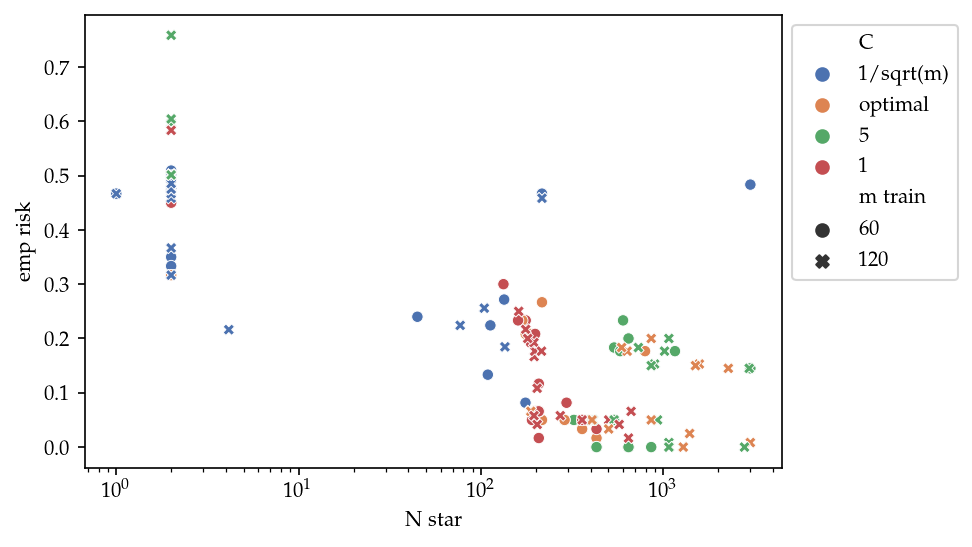

In [52]:
sns.scatterplot(data =  data,
x= "N star", y="emp risk", palette="deep", style = "m train", hue =  "C", s = 30)
plt.xscale("log")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [10]:
data.xs(120, level = "m_train")

,,,N_star,emp_risk
"kernel,dataset",Remp_eps,C,,
"(Havliscek, Generated)","(margin, 0.5)",1/sqrt(m),216.000000,0.458333
"(QAOA, Checkerboard)","(margin, 0.5)",5,2.000000,0.583333
"(Circ-Hubr, Two_Moons)","(margin, 0.5)",5,1072.000000,0.200000
"(Havliscek, Checkerboard)","(relative, 0.05)",1/sqrt(m),2.000000,0.501250
"(QAOA, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Havliscek, Two_Moons)","(margin, 0.5)",1/sqrt(m),2.000000,0.316667
"(Circ-Hubr, Two_Moons)","(relative, 0.05)",5,2957.000000,0.145000
"(QAOA, Two_Moons)","(margin, 0.5)",5,1072.000000,0.008333
"(Havliscek, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
